In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [91]:
# 통계분석을 위한 statsmodel
import statsmodels.api as sm

# 신고 데이터 불러오기

In [92]:
df = pd.read_csv('서울특별시_전동킥보드_견인_현황_20230131.csv', encoding='cp949')
df

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
88309,88310,2023-01-31,중구,서울특별시 중구 서소문동 37,오신고,2023-02-01
88310,88311,2023-01-31,동작구,서울특별시 동작구 노량진동 332,보도와 차도가 구분된 도로의 차도,2023-01-31
88311,88312,2023-01-31,동작구,서울특별시 동작구 대방동 415-40,기타,2023-02-01
88312,88313,2023-01-31,동작구,서울특별시 동작구 노량진동 329-16,기타,2023-02-01


In [93]:
df1 = df[['신고일', '구정보', '유형', '조치일']]
df1['신고일'] = pd.to_datetime(df1['신고일'])
df1['조치일'] = pd.to_datetime(df1['조치일'])

# 구 별 신고 건 수 구하기

In [94]:
dstDict=dict(df1['구정보'].value_counts().sort_values(ascending=False))
NdstDict = dict(sorted(dstDict.items()))
district = NdstDict.keys()
# dstDict

dict_values([9652, 8952, 7368, 7348, 6804, 5633, 5056, 4459, 3665, 3604, 3136, 2960, 2780, 2591, 2037, 2035, 2025, 1469, 1418, 1384, 1306, 1178, 1065, 387, 2])


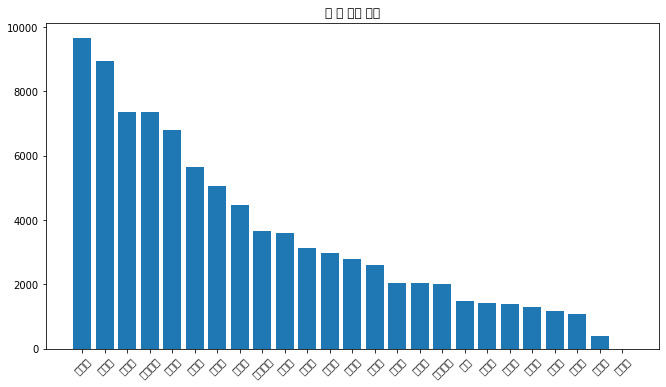

In [95]:
gu=dstDict.keys()
vals = dstDict.values()
plt.rc('font', family='Malgun Gothic') # For Windows
# print(plt.rcParams['font.family'])
plt.figure(figsize=(11,6))
plt.title('구 별 신고 건수')
plt.xticks(rotation=45)
plt.bar(gu, vals)
print(vals)

## 구 별 면적 데이터

In [96]:
area = pd.read_csv('행정구역_20230513133737.csv')

In [97]:
# 전처리 후 정렬
area = area[['자치구별(2)', '2021']]
area = area.iloc[3:]
area.set_index('자치구별(2)')
area['2021'].astype(float)

areadict = {}
for k, v in zip(area['자치구별(2)'], area['2021']):
    areadict[k] = float(v)

areadict = dict(sorted(areadict.items()))
areadict

{'강남구': 39.5,
 '강동구': 24.59,
 '강북구': 23.6,
 '강서구': 41.45,
 '관악구': 29.57,
 '광진구': 17.06,
 '구로구': 20.12,
 '금천구': 13.02,
 '노원구': 35.44,
 '도봉구': 20.65,
 '동대문구': 14.22,
 '동작구': 16.36,
 '마포구': 23.85,
 '서대문구': 17.63,
 '서초구': 46.98,
 '성동구': 16.86,
 '성북구': 24.58,
 '송파구': 33.88,
 '양천구': 17.41,
 '영등포구': 24.55,
 '용산구': 21.87,
 '은평구': 29.71,
 '종로구': 23.91,
 '중구': 9.96,
 '중랑구': 18.5}

## 주차구역 데이터

In [98]:
park = pd.read_csv('서울시 전동킥보드 주차구역 현황.csv', encoding='cp949')
park = park.drop_duplicates()
park

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기
0,1,종로구,팔판동 115-63,청와대 춘추문 맞은편 인근,Y,6.0
1,2,종로구,연건동 218-1,KT광화문 혜화지사 앞,Y,6.0
2,3,종로구,연건동 178-3,홍익대학교 대학로 맞은편,Y,6.0
3,4,종로구,동승동 1-24,대학로 마로니에공원 앞,Y,8.0
4,5,종로구,와룡동 75-4,연악사 맞은편,Y,8.0
...,...,...,...,...,...,...
188,188,강동구,명일동 46-5,고덕역 4번 출구 인근,N,NaN
189,189,강동구,명일동 303-1,명일역 2번 출구 인근,N,NaN
190,190,강동구,암사동 524,선사고등학교 앞,Y,8.0
191,191,강동구,강일동 679-6,강동공영차고지 버스정류장(25101) 인근,Y,6.0


In [99]:
GUP = park['시군구명'].value_counts().sort_index()
GUP.loc['영등포구'] = 0 # 영등포는 0이라 따로 추가 함
parkDict = dict(sorted(GUP.items()))

### 면적 당 주차구역 수 

In [100]:
parkPerArea = {}
for k in parkDict.keys():
    parkPerArea[k] = round(parkDict[k] / areadict[k], 4)
# parkPerArea

## 면적 당 신고 건 수

In [101]:
dstDict2=dict(sorted(dstDict.items(), key =lambda x : x[0]))
# dstDict2

In [102]:
singoPerArea = {}
for k in dstDict2.keys():
    singoPerArea[k] = round((dstDict2[k] / areadict[k]), 4)
# singoPerArea

In [103]:
singoPerArea = dict(sorted(singoPerArea.items(), key=lambda x: x[1]))
# singoPerArea

<BarContainer object of 25 artists>

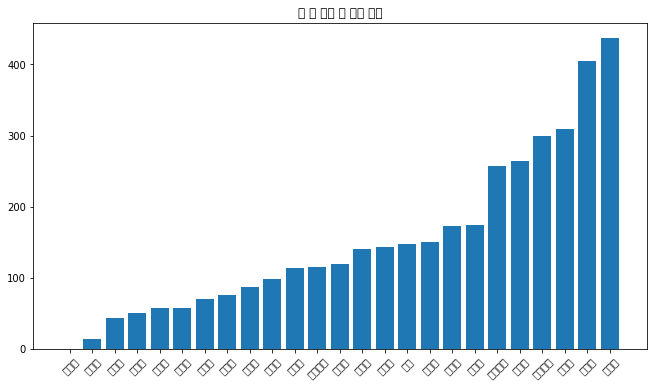

In [104]:
gu=singoPerArea.keys()
vals = singoPerArea.values()
plt.rc('font', family='Malgun Gothic') # For Windows
# print(plt.rcParams['font.family'])
plt.figure(figsize=(11,6))
plt.title('구 별 면적 당 신고 건수')
plt.xticks(rotation=45)
plt.bar(gu, vals)


## 대학 위치(소재지) 데이터

In [105]:
univs = pd.read_csv('서울시 대학 및 전문대학 DB 정보 (한국어).csv', encoding='cp949')
univs = univs[['학교명', '행정구', '주소']]
univs

,학교명,행정구,주소
0,서울시립대학교,동대문구,서울 동대문구 서울시립대로 163 (전농동 90번지)
1,서울여자간호대학교,서대문구,서울 서대문구 홍제3동 서울여자간호대학
2,서울여자대학교,노원구,서울특별시 노원구 화랑로 621 서울여자대학교
3,서일대학교,중랑구,서울 중랑구 서일대학길 22(면목동 49-3) 서일대학교
4,성공회대학교,구로구,서울 구로구 항동 성공회대학교
...,...,...,...
59,서울교육대학교,서초구,서울 서초구 서초중앙로 96(서초동 1650)
60,서울기독대학교,은평구,서울 은평구 갈현로 4길 26-2호
61,서울대학교,관악구,서울 관악구 관악로 1 서울대학교
62,서울디지털대학교,마포구,서울 마포구 도화동 560번지


In [106]:
len(univs['행정구'].unique())
# --> 대학이 없는 구가 몇 군데 있다!

21

In [107]:
univDict = {}
for k in area['자치구별(2)']:
    univDict[k] = 0 # 대학이 없는 구 --> 0으로 채우기

In [108]:
for i in range(64):
    univDict[univs.iloc[i][1]] += 1 # 대학이 위치한 행정 구 1개 당 +1
univDict = dict(sorted(univDict.items(), key=lambda x: x[1], reverse=True))
# univDict

## 구 별 대학교 학령인구 데이터

In [109]:
univPopulation = pd.read_excel('자치구별+대학교+학령인구(추계인구)_20230519222042.xlsx')
univPopulation = univPopulation[['자치구별(2)', '2022']].iloc[2:]
univPopulation.columns = ['구', '22년_인구']
univPopulation.reset_index(drop=True)

,구,22년_인구
0,노원구,25166
1,송파구,24233
2,강남구,21726
3,성북구,22666
4,양천구,18926
5,강서구,19458
6,은평구,17779
7,관악구,18593
8,강동구,16261
9,서초구,16178


In [110]:
popDict = {}
for k, v in zip(univPopulation['구'], univPopulation['22년_인구']):
    popDict[k] = v

In [111]:
# popDict

## 구 별 인구 수 데이터

In [112]:
ingu = pd.read_csv('주민등록인구.csv')
ingu = ingu[['동별(2)', '2023 1/4']]
ingu = ingu.iloc[2:]
ingu = ingu.reset_index(drop=True)
ingu.columns = ['구', '인구']
ingu = ingu.astype({'인구': int})
ingu

,구,인구
0,송파구,663704
1,강서구,573711
2,강남구,537817
3,노원구,506989
4,관악구,502628
5,은평구,468766
6,강동구,464027
7,양천구,442345
8,성북구,441855
9,구로구,417983


In [113]:
inguDict = {k : v for k, v in zip(ingu['구'], ingu['인구'])}

## 인구밀도 데이터

In [114]:
dense = pd.read_excel('인구밀도.xlsx')
dense = dense.iloc[1:]
dense = dense[['동별(2)', '2022.2']]
dense.columns = ['구', '인구밀도']
dense

,구,인구밀도
1,강남구,13522
2,강동구,18871
3,강북구,12614
4,강서구,13863
5,관악구,16950
6,광진구,20589
7,구로구,20796
8,금천구,18650
9,노원구,14334
10,도봉구,15205


In [115]:
denseDict = {k : v for k, v in zip(dense['구'], dense['인구밀도'])}

## 집값데이터

In [116]:
houseDict={
    '강남구':8727,
    '서초구':8555,
    '용산구':6661,
    '송파구':6102,
    '성동구':5651,
    '마포구':5279,
    '광진구':5201,
    '양천구':5021,
    '동작구':4794,
    '종로구':4769,
    '강동구':4712,
    '영등포구':4690,
    '중구':4672,
    '강서구':4059,
    '서대문구':3944,
    '동대문구':3781,
    '은평구':3594,
    '성북구':3567,
    '노원구':3525,
    '관악구':3502,
    '구로구':3379,
    '중랑구':3178,
    '금천구':3082,
    '강북구':3081,
    '도봉구':3037
}

## 1인가구 (연령별) 통계

In [117]:
# 데이터 정리
solo = pd.read_excel('1인가구(연령별).xlsx')
col_list = list(solo.iloc[1][:])
col_list[1] = '구'
solo.columns = col_list
solo = solo[col_list[1:]]
solo = solo.iloc[3:]
solo = solo.sort_values('구')
solo = solo.reset_index(drop=True)

In [118]:
solo['20대'] = solo['20~24세'] + solo['25~29세']
solo['30대'] = solo['30~34세'] + solo['35~39세']
solo['40대'] = solo['40~44세'] + solo['45~49세']
solo['50대'] = solo['50~54세'] + solo['55~59세']
solo['60대'] = solo['60~64세'] + solo['65~69세']
solo['70대++'] = solo['70~74세'] + solo['75~79세'] + solo['80~84세'] + solo['85세이상']
solo = solo[['구', '소계', '20대', '30대', '40대', '50대', '60대', '70대++']]
# solo

In [119]:
NdstDict = dict(sorted(dstDict.items()))
district = NdstDict.keys() # 구 이름만 추출
# district

In [120]:
# 주요 연령대 모음
soloAll = {k : v for k, v in zip(district, solo['소계'])}
solo20 =  {k : v for k, v in zip(district, solo['20대'])}
solo30 =  {k : v for k, v in zip(district, solo['30대'])}
solo40 =  {k : v for k, v in zip(district, solo['40대'])}
solo2030 = {}
solo3040 = {}
for d in list(solo['구']):    
    solo2030[d] = solo20[d] + solo30[d]
    solo3040[d] = solo30[d] + solo40[d]

## 구 별 연령대 별 거주자 수

In [121]:
# 데이터 정리
ageDst = pd.read_excel('주민등록인구(연령별_동별).xlsx')
col_list = list(ageDst.iloc[1][:])
col_list[1] = '구'
ageDst.columns = col_list
ageDst = ageDst[col_list[1:]]
ageDst = ageDst.iloc[2:]
ageDst = ageDst.reset_index(drop=True)
ageDst = ageDst.drop(['항목'], axis=1)
# ageDst

In [122]:
ageDst['20대'] = ageDst['20~24세'] + ageDst['25~29세']
ageDst['30대'] = ageDst['30~34세'] + ageDst['35~39세']
ageDst['40대'] = ageDst['40~44세'] + ageDst['45~49세']
ageDst['50대'] = ageDst['50~54세'] + ageDst['55~59세']
ageDst['60대'] = ageDst['60~64세'] + ageDst['65~69세']
ageDst['70대++'] = ageDst['70~74세'] + ageDst['75~79세'] + ageDst['80~84세'] + ageDst['85~89세'] + ageDst['90~94세'] + ageDst['95~99세']
ageDst = ageDst[['구', '소계', '20대', '30대', '40대', '50대', '60대', '70대++']]
# ageDst

In [123]:
# 주요 연령대 분리
ageAll = {k : v for k, v in zip(district, ageDst['소계'])}
age20 =  {k : v for k, v in zip(district, ageDst['20대'])}
age30 =  {k : v for k, v in zip(district, ageDst['30대'])}
age40 =  {k : v for k, v in zip(district, ageDst['40대'])}

age2030 = {}
age3040 = {}
ageOver50 = {}
for d in list(solo['구']):    
    age2030[d] = age20[d] + age30[d]
    age3040[d] = age30[d] + age40[d]
    ageOver50[d] = ageAll[d] - (age20[d] + age30[d] + age40[d])


## 구 별 지하철 역 수 데이터

In [124]:
subway = pd.read_csv('서울교통공사_자치구별지하철역정보.csv', encoding='cp949')
subway = subway.drop(['연번'], axis=1).iloc[:-5]
subway

,자치구,역수,역명(호선)
0,강남구,21,"삼성(2), 선릉(2), 역삼(2), 강남(2), 압구정(3), 신사(3), 매봉(..."
1,강동구,14,"천호(5), 강동(5), 길동(5), 굽은다리(5), 명일(5), 고덕(5), 상일..."
2,강북구,3,"수유(4), 미아(4), 미아사거리(4)"
3,강서구,9,"방화(5), 개화산(5), 김포공항(5), 송정(5), 마곡(5), 발산(5), 우..."
4,관악구,4,"낙성대(2), 서울대입구(2), 봉천(2), 신림(2)"
5,광진구,11,"건대입구(2), 구의(2), 강변(2), 군자(5), 아차산(5), 광나루(5), ..."
6,구로구,7,"구로디지털단지(2), 대림(2), 신도림(2), 도림천(2), 남구로(7), 천왕(..."
7,금천구,1,가산디지털단지(7)
8,노원구,13,"당고개(4), 상계(4), 노원(4), 석계(6), 태릉입구(6), 화랑대(6), ..."
9,도봉구,3,"창동(4), 쌍문(4), 도봉산(7)"


In [125]:
# 전처리 : 구 별 지하철 역 수
subwayDict = {k : v for k, v in zip(district, subway['역수'])}
# subwayDict

In [126]:
# 전처리 : 구 별 몇호선이 몇개 지나가는지 
numLines = {}
d= list(district)
for i in range(25):
    lineList = [int(station.lstrip()[-2]) for station in subway.iloc[i][2].split(',')]
    howManyLines = [0,0,0,0,0,0,0,0,0]
    for line in lineList:
        howManyLines[line-1] += 1
    numLines[d[i]] = howManyLines
# numLines

In [127]:
# 각 호선 별 어느 구에 몇 개의 역이 있는지 정리
LN1 = {k : v[0] for k, v in zip(district, numLines.values())}
LN2 = {k : v[1] for k, v in zip(district, numLines.values())}
LN3 = {k : v[2] for k, v in zip(district, numLines.values())}
LN4 = {k : v[3] for k, v in zip(district, numLines.values())}
LN5 = {k : v[4] for k, v in zip(district, numLines.values())}
LN6 = {k : v[5] for k, v in zip(district, numLines.values())}
LN7 = {k : v[6] for k, v in zip(district, numLines.values())}
LN8 = {k : v[7] for k, v in zip(district, numLines.values())}
LN9 = {k : v[8] for k, v in zip(district, numLines.values())}
LN29 = {}
LN289 = {}
for d in list(district):    
    LN29[d]  = LN2[d] + LN9[d]
    LN289[d] = LN2[d] + LN9[d] + LN8[d]

## 데이터 정리

In [128]:
# -----<< 구 이름 오름차순으로 데이터 정렬 >>-----
NdstDict = dict(sorted(dstDict.items()))
NareaDict = dict(sorted(areadict.items()))
NsingoPerArea = dict(sorted(singoPerArea.items()))
NunivDict = dict(sorted(univDict.items()))
NpopDict = dict(sorted(popDict.items()))
NinguDict = dict(sorted(inguDict.items()))
NdenseDict = dict(sorted(denseDict.items()))
NhouseDict = dict(sorted(houseDict.items()))

In [129]:
# << 구 이름 (이름 순 정렬됨) >>
NdstDict = dict(sorted(dstDict.items()))
district = NdstDict.keys()
district

dict_keys(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])

## 구 별 인구 당 신고 건수

In [130]:
ratio = []
ratioDict = {}
dlist, ilist = list(NdstDict.values()), list(NinguDict.values())
for d, i in zip(dlist, ilist):
    ratio.append(round(100*d/i, 5))
for k, v in zip(district, ratio):
    ratioDict[k] = v
# ratioDict
#ratio

# --<< 데이터 설명 >>--

In [141]:
'''
------------<<데이터 설명>>------------
dstDict      # 구 별 신고 건 수
areaDict     # 구 별 면적
singoPerArea # 구 별 면적 당 신고 건 수
univDict     # 구 별 대학 수 (분교 포함)
popDict      # 구 별 대학생 수 (학교 재학생 수 기준인지, 거주지 기준인지..?)
inguDict     # 구 별 인구 수
ratio        # 구 별 인구 당 신고 건 수 (type = list)
denseDict    # 구 별 인구밀도
houseDict    # 구 별 아파트 평당 매매가 (23/1월 기준)
parkDict     # 구 별 전동킥보드 주차장 수
parkPerArea  # 구 별 면적 당 전동킥보드 주차장 수
age##        # 구 별 연령대 별 인구       (## = All, 20, 30, 40, 2030, 3040, Over50)
solo##       # 구 별 연령대 별 1인가구 수 (## = All, 20, 30, 40, 2030, 3040)
subwayDict   # 구 별 지하철 역 수
LN#          # 구 별 N호선 역 수 (# = 1~9, 경의선, 수분선, 수인선은 데이터 없어서 넣지 못 함)
'''

'\n------------<<데이터 설명>>------------\ndstDict      # 구 별 신고 건 수\nareaDict     # 구 별 면적\nsingoPerArea # 구 별 면적 당 신고 건 수\nunivDict     # 구 별 대학 수 (분교 포함)\npopDict      # 구 별 대학생 수 (학교 재학생 수 기준인지, 거주지 기준인지..?)\ninguDict     # 구 별 인구 수\nratio        # 구 별 인구 당 신고 건 수 (type = list)\ndenseDict    # 구 별 인구밀도\nhouseDict    # 구 별 아파트 평당 매매가 (23/1월 기준)\nparkDict     # 구 별 전동킥보드 주차장 수\nparkPerArea  # 구 별 면적 당 전동킥보드 주차장 수\nage##        # 구 별 연령대 별 인구       (## = All, 20, 30, 40, 2030, 3040, Over50)\nsolo##       # 구 별 연령대 별 1인가구 수 (## = All, 20, 30, 40, 2030, 3040)\nsubwayDict   # 구 별 지하철 역 수\nLN#          # 구 별 N호선 역 수 (# = 1~9, 경의선, 수분선, 수인선은 데이터 없어서 넣지 못 함)\n'

# DataFrame 통합 및 시각화

In [175]:
# -----<< Make DataFrame >>-----
relation = {
    '구':           district,
# ---이하 데이터 중 필요한 데이터만 주석 해제 히시면 됩니다---
    '신고 수':      NdstDict.values(),
#     '면적':         NareaDict.values(),
#     '대학 수':      NunivDict.values(),
#     '대학생 수':    NpopDict.values(),
#     '인구 수':      NinguDict.values(),
#     '인구밀도' :    NdenseDict.values(),
#     '신고 수/인구': ratioDict.values(),
#     '신고 수/면적': NsingoPerArea.values(),
#     '아파트 평당 매매가(만원)': NhouseDict.values(),
#     '1인가구 전체': soloAll.values(),
#     '20대 1인가구': solo20.values(),
    '30대 1인가구': solo30.values(),
#     '40대 1인가구': solo40.values(),
#     '2030 1인가구': solo2030.values(),
#     '3040 1인가구': solo3040.values(),
#     '20대 인구': age20.values(),
#     '30대 인구': age30.values(),
#     '40대 인구': age40.values(),
#     '2030 인구': age2030.values(),
#     '3040 인구': age3040.values(),
#     '50++ 인구': ageOver50.values(),
#     '주차장 수': parkDict.values(),
#     '주차장 수/면적': parkPerArea.values(),
#     '지하철 역 수': subwayDict.values(),
#     '1호선 역 수': LN1.values(),
#     '2호선 역 수': LN2.values(),
#     '3호선 역 수': LN3.values(),
#     '4호선 역 수': LN4.values(),
#     '5호선 역 수': LN5.values(),
#     '6호선 역 수': LN6.values(),
#     '7호선 역 수': LN7.values(),
#     '8호선 역 수': LN8.values(),
#     '9호선 역 수': LN9.values(),
    '2, 9호선 수': LN29.values(),
#     '2, 8, 9호선 수': LN289.values(),
    
    }
rdf = pd.DataFrame(relation) # 'R elation D ata F rame'
rdf

,구,신고 수,30대 1인가구,"2, 9호선 수"
0,강남구,6804,21638,8
1,강동구,2780,12195,2
2,강북구,1178,7183,0
3,강서구,3604,24784,0
4,관악구,4459,35112,4
5,광진구,2960,15802,3
6,구로구,1418,12354,4
7,금천구,2,10704,0
8,노원구,2035,8519,0
9,도봉구,2037,5603,0


# 상관관계 시각화

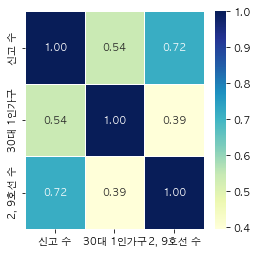

In [176]:
size = len(relation) # 데이터 수에 따라 가변크기 plot
plt.figure(figsize=(size,size))
sns.heatmap(data = rdf.corr(), annot=True, 
fmt = '.2f', linewidths=.8, cmap='YlGnBu')
from matplotlib import font_manager, rc
# font_path = "./malgun.ttf"   #폰트파일의 위치
# font_name = font_manager.FontProperties(fname=font_path).get_name()
font_name = 'AppleGothic'
plt.rc('font', family=font_name)

In [145]:
# 데이터프레임 정규화
nrdf = (rdf - rdf.mean())/rdf.std()
nrdf['constant'] = 1 # 분석에 필요한 상수항 추가

In [146]:
!pip install mlxtend

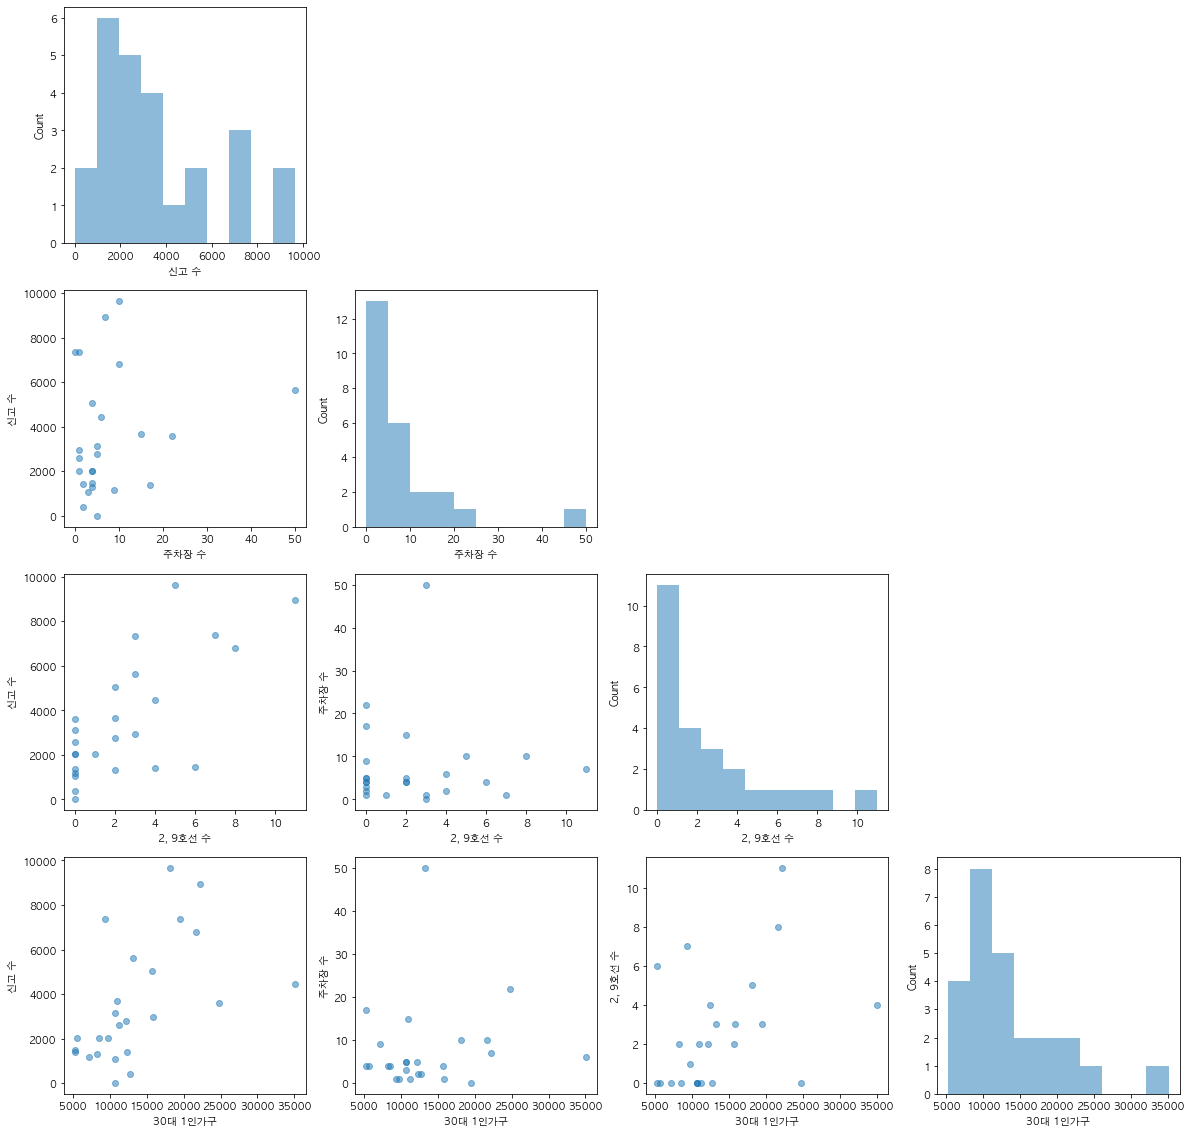

In [170]:
#   === < pairplot 그리는 코드입니다. 4개가 넘어가면 상당히 느려지니 주의하세요! > ===

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['신고 수','주차장 수' ,'2, 9호선 수', '30대 1인가구']
scatterplotmatrix(rdf[cols].values, names = cols, alpha = 0.5,figsize =(20,20))

plt.show()

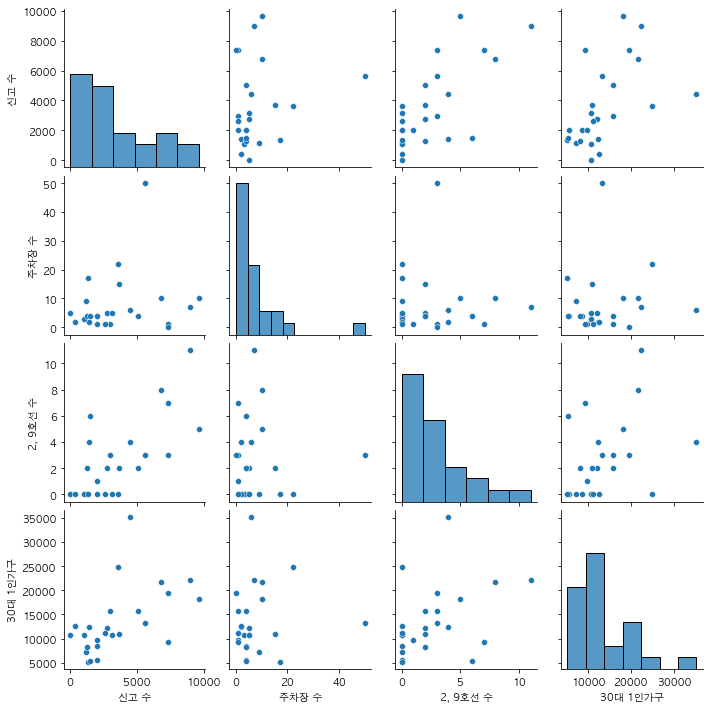

In [148]:
sns.pairplot(rdf[cols])
plt.show()

In [149]:
model = sm.OLS(nrdf['신고 수'], # 타깃 변수
               # 각 Attribute들이 최대한 !독립적!인 Attribute들로 구성할 것! ---> VIF_Factor로 다중공선성 검증
               nrdf[[
                   '아파트 평당 매매가(만원)', 
#                      '대학 수', 
#                      '대학생 수', 
                     '인구밀도',
                     '30대 1인가구', 
                     '주차장 수/면적', 
#                      '지하철 역 수',
                     '2, 9호선 수', 
                     'constant'
                    ]]
              )
result = model.fit()
# print(result.summary())
result.summary()
#------------------------< 표 해석 >------------------------
# R-squared > 0.5 는 되어야 쓸만한 모델
#
# 결정 계수를 뜻하는 단어로 회귀모형 유용성의 척도입니다.
#
# P>|t| <= 0.05 는 되어야 유의미한 p-value
#-----------------------------------------------------------
# https://ysyblog.tistory.com/119 --> 표 상세 해석

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   신고 수   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     6.901
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           0.000793
Time:                        14:35:30   Log-Likelihood:                -22.022
No. Observations:                  25   AIC:                             56.04
Df Residuals:                      19   BIC:                             63.36
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
아파트 평당 매매가(만원)     0.2694      0.192      1.405      0.176      -0.132       0.671
인구밀도               0.0107      0.156      0.068      0.946      -0.317       0.338
30대 1인가구           0.3120      0.149      2.090      0.050      -0.000       0.624
주차장 수/면적           0.0348      0.148      0.234      0.817      -0.276       0.345
2, 9호선 수           0.4454      0.187      2.382      0.028       0.054       0.837
constant        1.309e-16      0.134   9.77e-16      1.000      -0.280       0.280
==============================================================================
Omnibus:                        3.731   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                2.347
Skew:                           0.732   Prob(JB):                        0.309
Kurtosis:                       3.327   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#------------------------------------------------------------------------------------
#  VIF > 10 --> 변수 간에 다중공선성이 있다고 판단됨!
#  어떤 변수의 VIF > 10은  그 변수 없이도 충분히 반응변수(y)를 잘 설명할 수 있으므로,
#  해당 독립변수는 없어도 된다는 것을 의미합니다.
#------------------------------------------------------------------------------------
X_train =   nrdf[[
                    '아파트 평당 매매가(만원)', 
#                      '대학 수', 
#                      '대학생 수', 
                     '인구밀도',
                     '30대 1인가구', 
                     '주차장 수/면적', 
#                      '지하철 역 수',
                     '2, 9호선 수', 
                     'constant'
                    ]]

def VIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

vif = VIF(X_train)
# print(vif)
vif

,VIF_Factor,Feature
0,1.966895,아파트 평당 매매가(만원)
1,1.308561,인구밀도
2,1.191963,30대 1인가구
3,1.178953,주차장 수/면적
4,1.870753,"2, 9호선 수"
5,1.000000,constant


# 지도 만들기!

In [151]:
import seaborn as sns 
import geopandas as gpd
import folium
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

### 지도 그리기

In [152]:
m = folium.Map(
    location=[37.559819, 126.973895],
    zoom_start=11, 
    tiles='cartodbpositron'
#     tiles='OpenStreetMap'

)

m.choropleth(geo_data=seoul_geo,
             data=NdstDict,
#              data=NdenseDict, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.3,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="지역구별 신고 수"
            )


In [153]:
data = gpd.read_file('LARD_ADM_SECT_SGG_서울', encoding='euc-kr')
folium.GeoJson(
    seoul_geo,
    name='지역구',
              ).add_to(m)
m # 서울 각 지역구를 구분하기

### 마포구 신고 위치를 중복이 없게 변환 (중복된 횟수를  column으로 따로 빼기)

In [154]:
mapo = pd.read_csv('마포구(중복).csv')
mapo.columns = ['주소']
mapoo = []
for i in df['주소']:
    if '마포구' in i : 
        mapoo.append(i)
mapo_real = sorted(list(set(mapoo)))

In [155]:
mapo = pd.read_excel('마포구좌표.xlsx') 
mapo.columns = ['X-좌표', 'Y-좌표']
mapo['주소'] = mapo_real[:-1]

In [156]:
mapo['dup']=0
dupList_mapo = [0 for _ in range(len(mapo_real))]
jusolist = list(df['주소'])
j = 0
for i in tqdm(mapo_real):
    c = jusolist.count(i)
    dupList_mapo[j] += c
    j += 1

100%|█████████████████████████████████████| 2148/2148 [00:01<00:00, 1294.69it/s]


In [157]:
# 긱 신고 위치의 중복 횟수 삽입
mapo['dup'] = dupList_mapo[:-1]

### 송파구 신고 위치를 중복이 없게 변환 (중복된 횟수를  column으로 따로 빼기)

In [158]:
songpa = pd.read_excel('송파구좌표.xlsx')
songpa['dup']=0
dupList = [0 for _ in range(len(songpa))]
jusolist = list(df['주소'])
j = 0
for i in tqdm(songpa['field1']):
    c = jusolist.count(i)
    dupList[j] += c
    j += 1

100%|█████████████████████████████████████| 1776/1776 [00:01<00:00, 1376.96it/s]


In [159]:
# 긱 신고 위치의 중복 횟수 삽입
songpa['dup'] = dupList

#### 지하철 역 좌표 데이터

In [160]:
station = pd.read_excel('지하철역좌표.xlsx')
station

,역,X-좌표,Y-좌표
0,종합운동장역,37.511433,127.076313
1,삼전역,37.504356,127.088040
2,석촌역,37.504929,127.106682
3,송파나루역,37.510303,127.112231
4,올림픽공원역,37.516132,127.130282
5,잠실나루,37.520688,127.103836
6,잠실,37.513305,127.100129
7,종합운동장,37.511008,127.073641
8,합정,37.550025,126.914557
9,홍대입구,37.556748,126.923643


# 마포, 송파구의 신고 지점 표시

In [161]:
import geopandas as gpd
import folium
mapo_data = pd.read_excel('마포구좌표.xlsx')

data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=11,tiles='cartodbpositron')

seoul_map.choropleth(geo_data=seoul_geo,
             data=NdstDict,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="지역구별 신고 수"
            )

# folium.GeoJson(data).add_to(seoul_map)
for _, row in mapo_data.iterrows():
    folium.Marker(
        location=[row['Y-좌표'], row['X-좌표']],
        icon=folium.Icon(color='blue')
    ).add_to(seoul_map)

# seoul_map.save('./seoul_mapo.html')
seoul_map

In [162]:
import geopandas as gpd
import folium

songpa_data = pd.read_excel('./송파구좌표.xlsx')

data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=11,tiles='cartodbpositron')

seoul_map.choropleth(geo_data=seoul_geo,
             data=NdstDict,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="지역구별 신고 수"
            )

# folium.GeoJson(data).add_to(seoul_map)
for _, row in songpa_data.iterrows():
    folium.Marker(
        location=[row['_Y'], row['_X']],
        icon=folium.Icon(color='blue')
    ).add_to(seoul_map)

# seoul_map.save('./seoul_songpa.html')
seoul_map

# 지하철 역으로부터 1Km 반경 표시와 그 이내에 위치한 신고 장소 비율 계산

In [165]:
import geopandas as gpd
import folium

parking_data = pd.read_excel('./지하철역좌표.xlsx')

data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=11,tiles='cartodbpositron')

seoul_map.choropleth(geo_data=seoul_geo,
             data=NdstDict,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="지역구별 신고 수"
            )

# folium.GeoJson(data).add_to(seoul_map)
# for _, row in parking_data.iterrows():
#     folium.Circle(
#         location=[row['X-좌표'], row['Y-좌표']],
#         radius=1000,  # 반경 (미터 단위)
#         color='white',
#         fill=True,
#         popup=[row["역"] ],
#         tooltip="Circle tooltip",
#         ).add_to(seoul_map)
for _, row in parking_data.iterrows():
    folium.Marker(
        location=[row['_Y'], row['_X']],
        icon=folium.Icon(color='blue')
    ).add_to(seoul_map)


# seoul_map.save('./seoul_station.html')
seoul_map

KeyError: '_Y'

In [62]:
# 각 데이터를 (위도, 경도)로 정리
mapo_coord = []
songpa_coord = []
station_coord = []
for x, y in zip(mapo['X-좌표'], mapo['Y-좌표']):
    mapo_coord.append((y,x))
for x, y in zip(songpa['_X'], songpa['_Y']):
    songpa_coord.append((y,x))
for x, y in zip(station['X-좌표'], station['Y-좌표']):
    station_coord.append((x,y))

In [66]:
!pip install geopy

In [67]:
from geopy.distance import geodesic
import time
from tqdm import tqdm

cnt = 0
near_mapo_station = []
near_songpa_station = []

# 마포구의 역 1Km 반경 내 신고 장소 수
for i in tqdm(range(len(mapo))):    
    coord = (mapo.iloc[i][1], mapo.iloc[i][0])
    for station in station_coord:
        dst = geodesic(station, coord).meters
        if dst <= 1000:
            near_mapo_station.append(mapo.iloc[i])
            multiplier = mapo.iloc[i][3]
            cnt += 1 * multiplier
            break # 신고지점이 어느 한 역에라도 가까우면 바로 다음 신고지점으로 넘어갑니다.

# 송파구의 역 1Km 반경 내 신고 장소 수            
for i in tqdm(range(len(songpa))):    
    coord = (songpa.iloc[i][3], songpa.iloc[i][2])
    for station in station_coord:
        dst = geodesic(station, coord).meters
        if dst <= 1000:
            near_songpa_station.append(songpa.iloc[i])
            multiplier = songpa.iloc[i][4]
            cnt += 1 * multiplier
            break # 신고지점이 어느 한 역에라도 가까우면 바로 다음 신고지점으로 넘어갑니다.
            
print(f"마포구 역으로부터 1Km 이내 신고 장소 수 : {len(near_mapo_station)}")
print(f"송파구 역으로부터 1Km 이내 신고 장소 수 : {len(near_songpa_station)}")
sum_coord = 9652 + 8952 # 마포, 송파의 신고건수 합계
print(f"중복 포함한 마포+송파구의 신고 장소 수 : {sum_coord}")
print(f"역으로부터 1Km 이내 신고 장소 수 (중복 포함): {cnt}")
print(f"비율 : {round(100*cnt/sum_coord, 3)} %")

100%|█████████████████████████████████████| 1776/1776 [00:01<00:00, 1399.64it/s]

마포구 역으로부터 1Km 이내 신고 장소 수 : 1155
송파구 역으로부터 1Km 이내 신고 장소 수 : 788
중복 포함한 마포+송파구의 신고 장소 수 : 18604
역으로부터 1Km 이내 신고 장소 수 (중복 포함): 9869
비율 : 53.048 %


# 조사에 참고한 자료

In [ ]:
'''
<참조 논문> https://koreascience.kr/article/JAKO202111037332933.pdf

이용 특성을 살펴보면 2020년 6월
기준 일평균 13,648회, 2,286대, 9,013인이 이용하며, 
기기당 약 6.0회/대, 인당 약 1.5회/인 이용하는 것으로 나타났다. 
평균 이용시간은 9.4분, 이용거리는 1.5km, 이동속도는 10.3km/h인 것으로 나타났다. 

공간적 분포를 살펴보면
지하철역, 대학교, 복합쇼핑몰 등 통행 유발시설이 위치한 지역에서 주로 이용되는 것으로 나타났다.

인구 및 사회경제지표를 살펴보면 
10~30대 인구가 많이 거주하고, 
40대 이상 인구가 적게 거주할수록, 
생활인구와 3차산업 사업체수가 많을수록 이용량이 증가하는 것으로 나타났다. 

지하철역 출구 수, 버스정류장 수 등이 많고 
근린생활시설, 업무시설, 교육시설 등의 연면적이 클수록 
이용수요가 많은 것으로 분석되었다. 

또한, 평균 기온이 높고, 맑은 날에 이용수요가 많은 것으로 분석되었다.

통근 통학 및 사적인 이유(약속 등)의 목적으로 많이 이용된다.
1.5Km 미만의 통행이 주 이용 비율이다.
'''

In [7]:
print(f"{'text':_<20}")
print(f"{'text':_^20}")
print(f"{'text':_>20}")

text________________
________text________
________________text


# 교수님 피드백 시간 조언
### 답에 맞춰 그럴듯 한 질문하기
### 이럴 것이라 생각 했어서 이런 분석을 해봤더니 이렇게 됐다
### 근거도 뒷받침되면 좋을 것